In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

f_path = "/home/mike-rob/Development/Analytic_Dev/data/Vendor_Payments.csv"

df = pd.read_csv(f_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130456 entries, 0 to 130455
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Fiscal_Year             130456 non-null  int64  
 1   Fiscal_Period           130456 non-null  int64  
 2   Invoice_Status          130456 non-null  object 
 3   Vendor_ID               130456 non-null  int64  
 4   Vendor_Name             130456 non-null  object 
 5   Check_Number            130456 non-null  int64  
 6   Payment_Amount          130456 non-null  float64
 7   Check_Date              130456 non-null  object 
 8   Invoice_Number          130456 non-null  int64  
 9   invoice_date            130456 non-null  object 
 10  Line_Item_Desc          130456 non-null  object 
 11  Purch_Order_No          130456 non-null  object 
 12  Org_Code                130456 non-null  int64  
 13  Org_Description         130456 non-null  object 
 14  Object_Code         

In [3]:
df = df.drop(columns=['Department','Department_Description'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130456 entries, 0 to 130455
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiscal_Year         130456 non-null  int64  
 1   Fiscal_Period       130456 non-null  int64  
 2   Invoice_Status      130456 non-null  object 
 3   Vendor_ID           130456 non-null  int64  
 4   Vendor_Name         130456 non-null  object 
 5   Check_Number        130456 non-null  int64  
 6   Payment_Amount      130456 non-null  float64
 7   Check_Date          130456 non-null  object 
 8   Invoice_Number      130456 non-null  int64  
 9   invoice_date        130456 non-null  object 
 10  Line_Item_Desc      130456 non-null  object 
 11  Purch_Order_No      130456 non-null  object 
 12  Org_Code            130456 non-null  int64  
 13  Org_Description     130456 non-null  object 
 14  Object_Code         130456 non-null  int64  
 15  Object_Description  130456 non-nul

In [5]:
count=0
for col in df.columns:
    if 'ID' in col:
        df = df.drop(columns=col)
        count+=1

print(f"{count=}")

count=3


In [6]:
count=0
for col in df.columns:
    if 'Code' in col:
        df = df.drop(columns=col)
        count+=1

print(f"{count=}")

count=6


In [7]:
count=0
rename_cols = {}
for col in df.columns:
    if col.endswith('_'):
        rename_cols[col] = col.rstrip('_')
        count+=1
        print(f"{rename_cols}")

df.rename(rename_cols, inplace=True)
print(f"{count=}")


{'Function_': 'Function'}
count=1


In [8]:
df['Function'] = df['Function_']
df = df.drop(columns='Function_')

In [9]:
df['Function'].sample(12)

115612             UNDEFINED
16594     GENERAL GOVERNMENT
30517     GENERAL GOVERNMENT
103951       WATER UTILITIES
17688     GENERAL GOVERNMENT
71887     GENERAL GOVERNMENT
35391       ELECTRIC UTILITY
84214          PUBLIC SAFETY
126238    GENERAL GOVERNMENT
18079     GENERAL GOVERNMENT
17594     GENERAL GOVERNMENT
27363              UNDEFINED
Name: Function, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130456 entries, 0 to 130455
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiscal_Year         130456 non-null  int64  
 1   Fiscal_Period       130456 non-null  int64  
 2   Invoice_Status      130456 non-null  object 
 3   Vendor_Name         130456 non-null  object 
 4   Check_Number        130456 non-null  int64  
 5   Payment_Amount      130456 non-null  float64
 6   Check_Date          130456 non-null  object 
 7   Invoice_Number      130456 non-null  int64  
 8   invoice_date        130456 non-null  object 
 9   Line_Item_Desc      130456 non-null  object 
 10  Purch_Order_No      130456 non-null  object 
 11  Org_Description     130456 non-null  object 
 12  Object_Description  130456 non-null  object 
 13  Payment_Type        130456 non-null  object 
 14  Payment_Status      130456 non-null  object 
 15  Fund                130456 non-null  ob

In [11]:
df.nunique()

Fiscal_Year                4
Fiscal_Period             12
Invoice_Status             3
Vendor_Name             2179
Check_Number           58025
Payment_Amount         57700
Check_Date              1030
Invoice_Number        119862
invoice_date               1
Line_Item_Desc         43746
Purch_Order_No             1
Org_Description          196
Object_Description       183
Payment_Type               1
Payment_Status             1
Fund                      30
Division                  32
Department_No              1
Function                  12
dtype: int64

In [12]:
for col in df.columns:
    if df[col].nunique() < 2:
        df = df.drop(columns=col)
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130456 entries, 0 to 130455
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Fiscal_Year         130456 non-null  int64  
 1   Fiscal_Period       130456 non-null  int64  
 2   Invoice_Status      130456 non-null  object 
 3   Vendor_Name         130456 non-null  object 
 4   Check_Number        130456 non-null  int64  
 5   Payment_Amount      130456 non-null  float64
 6   Check_Date          130456 non-null  object 
 7   Invoice_Number      130456 non-null  int64  
 8   Line_Item_Desc      130456 non-null  object 
 9   Org_Description     130456 non-null  object 
 10  Object_Description  130456 non-null  object 
 11  Fund                130456 non-null  object 
 12  Division            130456 non-null  object 
 13  Function            130456 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 14.9+ MB


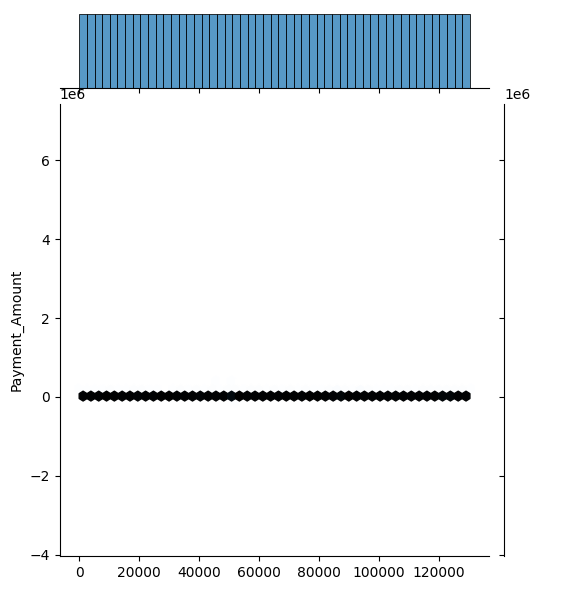

In [43]:
df1 = df[['Function','Payment_Amount']]
# sns.histplot(df1 ,bins=30)
# sns.kdeplot(df1, shade=True)
# sns.rugplot(df1)
# sns.ecdfplot(df1)
# sns.violinplot(x=df)
# sns.boxplot(df1)
sns.jointplot(df1['Payment_Amount'], kind='hex')